<a href="https://colab.research.google.com/github/BALAVIDULA/face_verification/blob/main/Face_Verification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install dlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 28 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=d5b9cc6aa4cbff9d6f3fdc001dd45443e909e3814b9203847c73801f57f257fd
  Stored in directory: /root/.cache/pip/wheels/b4/4b/8f/751e99d45f089bdf366a7d3e5066db3c2b84a62e4377f534d7
Successfully built face-recognition-models


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import face_recognition as fr
import cv2
import numpy as np
import os

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data=ImageDataGenerator(rescale=1/255)
valid_data=ImageDataGenerator(rescale=1/255)
training=train_data.flow_from_directory('/content/drive/MyDrive/projects/face_recog/face_rec_project/DATASET',target_size=(256,256),batch_size=64,shuffle=True)

Found 229 images belonging to 8 classes.


In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(256,256,3),filters=8,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=8,kernel_size=(2,2),padding="same",activation="relu"))
model.add(Conv2D(filters=8,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(3,3),strides=(3,3)))
model.add(Conv2D(filters=256,kernel_size=(2,2),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(3,3),strides=(3,3)))
model.add(Conv2D(filters=158,kernel_size=(2,2),padding="same",activation="relu"))
model.add(Conv2D(filters=158,kernel_size=(2,2),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(3,3),strides=(3,3)))

In [ ]:
model.add(Flatten())
model.add(Dense(units=1,activation="sigmoid"))

In [ ]:
model.summary()
model.compile(optimizer=tensorflow.optimizers.Adam(),loss='binary_crossentropy',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 8)       224       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 8)       264       
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 256, 8)       584       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 8)        0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 85, 85, 256)       8448      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 256)      0         
 2D)                                                    

In [ ]:
model.fit_generator(training, epochs=2)

<ipython-input-12-8338bc7e4166>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(training, epochs=2)


Epoch 1/2
4/4 [==============================] - 107s 19s/step - loss: 0.5925 - accuracy: 0.6949
Epoch 2/2
4/4 [==============================] - 12s 3s/step - loss: 0.4314 - accuracy: 0.8750


In [ ]:
validating=valid_data.flow_from_directory('/content/drive/MyDrive/projects/face_recog/face_rec_project/DATASET',target_size=(256,256),batch_size=64,shuffle=True)

Found 229 images belonging to 8 classes.


In [ ]:
path = "/content/drive/MyDrive/projects/face_recog/face_rec_project/DATASET/TRAINING/train_img"
known_names = []
known_name_encodings = []
images = os.listdir(path)

In [ ]:
for _ in images:
  image = fr.load_image_file(path +"/"+ _)
  image_path = path +"/"+ _
  encoding = fr.face_encodings(image)[0]
  known_name_encodings.append(encoding)
  known_names.append(os.path.splitext(os.path.basename(image_path))[0].capitalize())

In [ ]:
test_image = "/content/drive/MyDrive/projects/face_recog/face_rec_project/DATASET/TESTING/test_img/test66.jpeg"
image = cv2.imread(test_image)

In [ ]:
face_locations = fr.face_locations(image)
face_encodings = fr.face_encodings(image, face_locations)

In [ ]:
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
   matches = fr.compare_faces(known_name_encodings, face_encoding)
   name = ""
   face_distances = fr.face_distance(known_name_encodings, face_encoding)
   best_match = np.argmin(face_distances)
   if matches[best_match]:
       name = known_names[best_match]
   cv2.rectangle(image, (left, top), (right, bottom), (0, 0, 255), 2)
   cv2.rectangle(image, (left, bottom - 15), (right, bottom), (0, 0, 255), cv2.FILLED)
   font = cv2.FONT_HERSHEY_DUPLEX
   cv2.putText(image, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

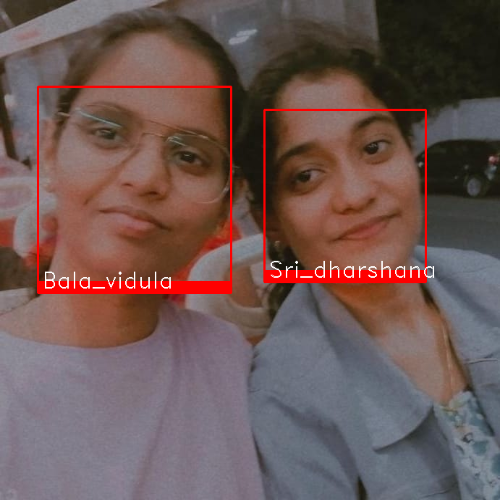

In [ ]:
from google.colab.patches import cv2_imshow

height = 500
width = 500
dimensions = (width, height)
new_image = cv2.resize(image, dimensions, interpolation=cv2.INTER_LINEAR)
cv2_imshow(new_image)


In [ ]:
cv2.imwrite("./output.jpg", image)

True

In [ ]:
model.evaluate(validating)

4/4 [==============================] - 12s 3s/step - loss: 0.3857 - accuracy: 0.8750


[0.3857215344905853, 0.875]

In [ ]:
model.save("FaceRecog_model.h5")